In [143]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

import bathymetry as Bathy

In [144]:
reload(Bathy)

map_path = '../src/asc/MNT_MED100m_GDL-CA_HOMONIM_WGS84_NM_ZNEG.asc'
map = Bathy.Map.from_asc(map_path)

# print(map)
# map.display()

In [147]:
start = (2.8995, 41.6995)  # lower left
stop = (7.9005, 41.6995)  # lower right

x, z = map.cut(start, stop, npoints=100)

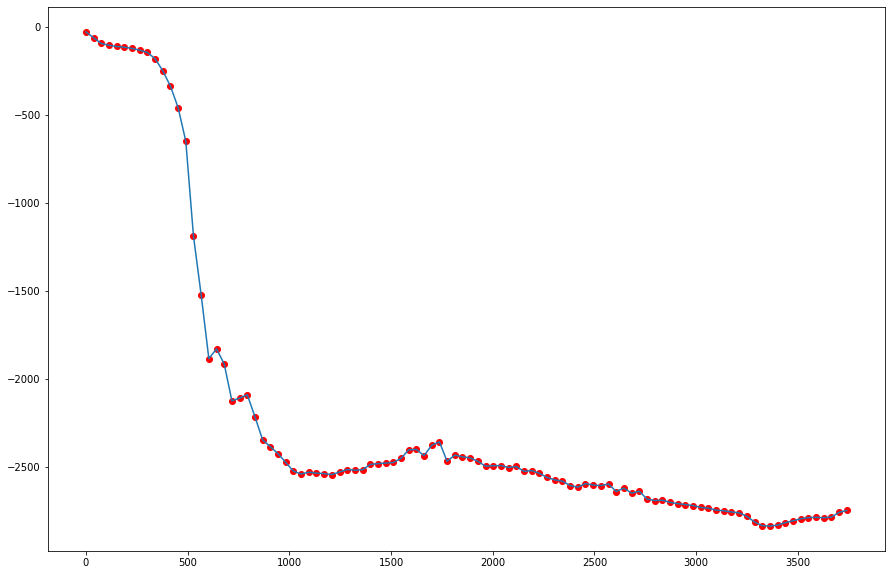

In [146]:
plt.figure(figsize=(15, 10))
plt.plot(x, z)
plt.scatter(x, z, c='r')